In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')

In [ ]:
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.shape

(15509, 10)

In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
# Creating a function of calculating missing values percentage

def missing_values_with_percent():
    return pd.DataFrame({
    'Missing Values': df.isna().sum().values,
    'Percentage': ((df.isna().sum()/len(df)) * 100).apply(lambda x: f'{x:.2f}%')
}, index=df.columns)

In [ ]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,528,3.40%
Duration,8269,53.32%
Genre,1877,12.10%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%
Actor 2,2384,15.37%
Actor 3,3144,20.27%


In [ ]:
# checking for missing values according to row
df.isnull().sum(axis=1).sort_values(ascending=False)

1920     9
1836     9
3807     9
8669     9
9600     9
        ..
7385     0
7383     0
7380     0
7377     0
15508    0
Length: 15509, dtype: int64

In [ ]:
df.drop(['Actor 2', 'Actor 3'], axis=1, inplace=True)

In [ ]:
df[df['Name'] == 'A Ballad of Maladies']

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
135,A Ballad of Maladies,(2016),86 min,"Documentary, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav
136,A Ballad of Maladies,(2016),86 min,"Documentary, History, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav


In [ ]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,528,3.40%
Duration,8269,53.32%
Genre,1877,12.10%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%


In [ ]:
df.dropna(subset=['Duration'],inplace=True)

In [ ]:
df = df[(df.isnull().sum(axis=1).sort_values(ascending=False) <= 5)]

<ipython-input-98-bac97b958edb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(df.isnull().sum(axis=1).sort_values(ascending=False) <= 5)]


In [ ]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,125,1.73%
Duration,0,0.00%
Genre,187,2.58%
Rating,1389,19.19%
Votes,1389,19.19%
Director,14,0.19%
Actor 1,264,3.65%


In [ ]:
df.dropna(subset=['Rating','Votes'],inplace=True)

In [ ]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,0,0.00%
Duration,0,0.00%
Genre,31,0.53%
Rating,0,0.00%
Votes,0,0.00%
Director,1,0.02%
Actor 1,75,1.28%


In [ ]:
df.Director.describe()

count             5850
unique            2549
top       David Dhawan
freq                41
Name: Director, dtype: object

In [ ]:
df.groupby('Director').Director.count().sort_values(ascending=False)

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         34
Shakti Samanta          34
Hrishikesh Mukherjee    33
                        ..
Kathir                   1
Kashmira Shah            1
Kashinath                1
Kasam Ali                1
Zunaid Memon             1
Name: Director, Length: 2549, dtype: int64

In [ ]:
df['Director'].fillna('David Dhawan',inplace=True)

In [ ]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,0,0.00%
Duration,0,0.00%
Genre,31,0.53%
Rating,0,0.00%
Votes,0,0.00%
Director,0,0.00%
Actor 1,75,1.28%


In [ ]:
df.groupby('Genre').Genre.count().sort_values(ascending=False)

Genre
Drama                            870
Drama, Romance                   334
Action, Crime, Drama             329
Action, Drama                    207
Comedy, Drama                    206
                                ... 
Documentary, Adventure, Crime      1
Documentary, Adventure, Music      1
Documentary, Biography, Music      1
Documentary, Comedy, Drama         1
Crime, Musical, Mystery            1
Name: Genre, Length: 393, dtype: int64

In [ ]:
df['Genre'].fillna('Drama',inplace=True)

In [ ]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,0,0.00%
Duration,0,0.00%
Genre,0,0.00%
Rating,0,0.00%
Votes,0,0.00%
Director,0,0.00%
Actor 1,75,1.28%


In [ ]:
df['Actor 1'].describe()

count                 5776
unique                2046
top       Amitabh Bachchan
freq                   104
Name: Actor 1, dtype: object

In [ ]:
df['Actor 1'].fillna('Amitabh Bachchan', inplace=True)

In [ ]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,0,0.00%
Duration,0,0.00%
Genre,0,0.00%
Rating,0,0.00%
Votes,0,0.00%
Director,0,0.00%
Actor 1,0,0.00%


In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave


In [ ]:
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True)

In [ ]:
df['Duration'] = df['Duration'].str.replace(r' min', '', regex=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   object 
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), object(7)
memory usage: 411.4+ KB


In [ ]:
df['Year'] = df['Year'].astype('int')
df['Duration'] = df['Duration'].astype('int')

In [ ]:
df['Votes'] = df['Votes'].str.replace(',','')

In [ ]:
df['Votes'] = df['Votes'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int64  
 2   Duration  5851 non-null   int64  
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int64  
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 411.4+ KB


In [ ]:
df.describe()

,Year,Duration,Rating,Votes
count,5851.000000,5851.000000,5851.000000,5851.000000
mean,1996.416852,132.294480,5.931875,2611.273116
std,19.914640,26.555826,1.389942,13433.828528
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.500000
max,2021.000000,321.000000,10.000000,591417.000000


Text(0.5, 1.0, 'Number of Movies Per Year')

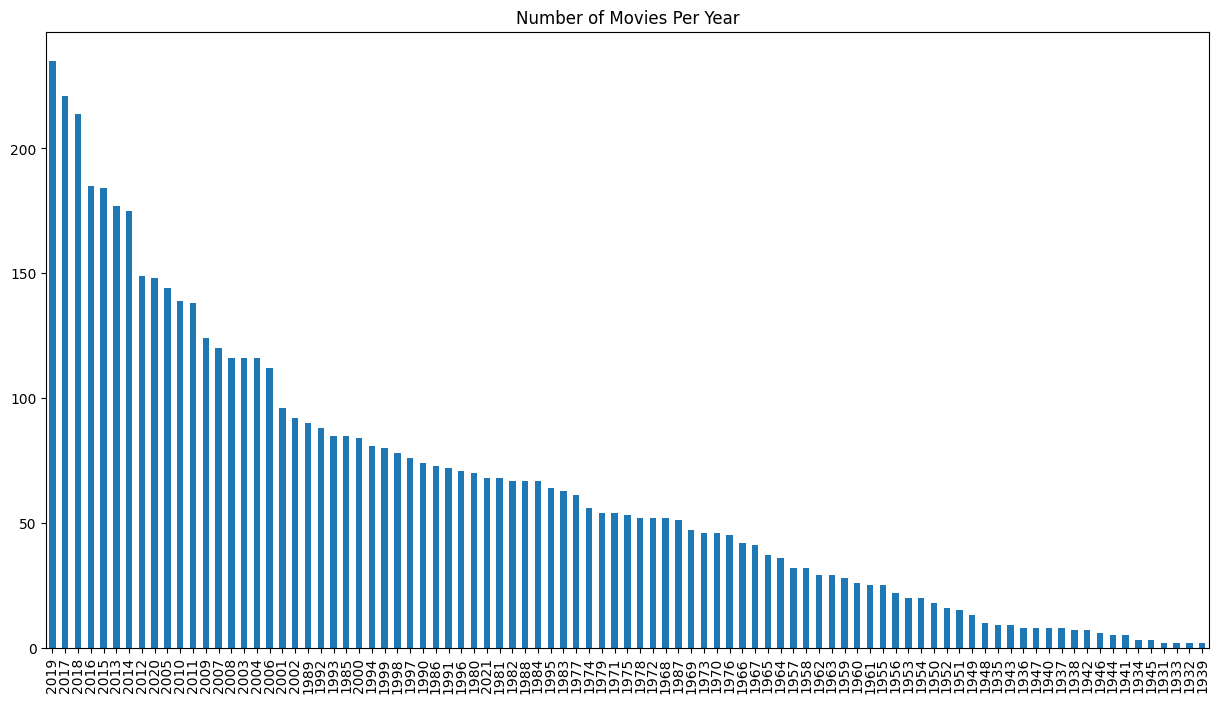

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
df['Year'].value_counts().plot(kind='bar')
plt.title('Number of Movies Per Year')

Text(0.5, 1.0, 'Actor with Many Movies')

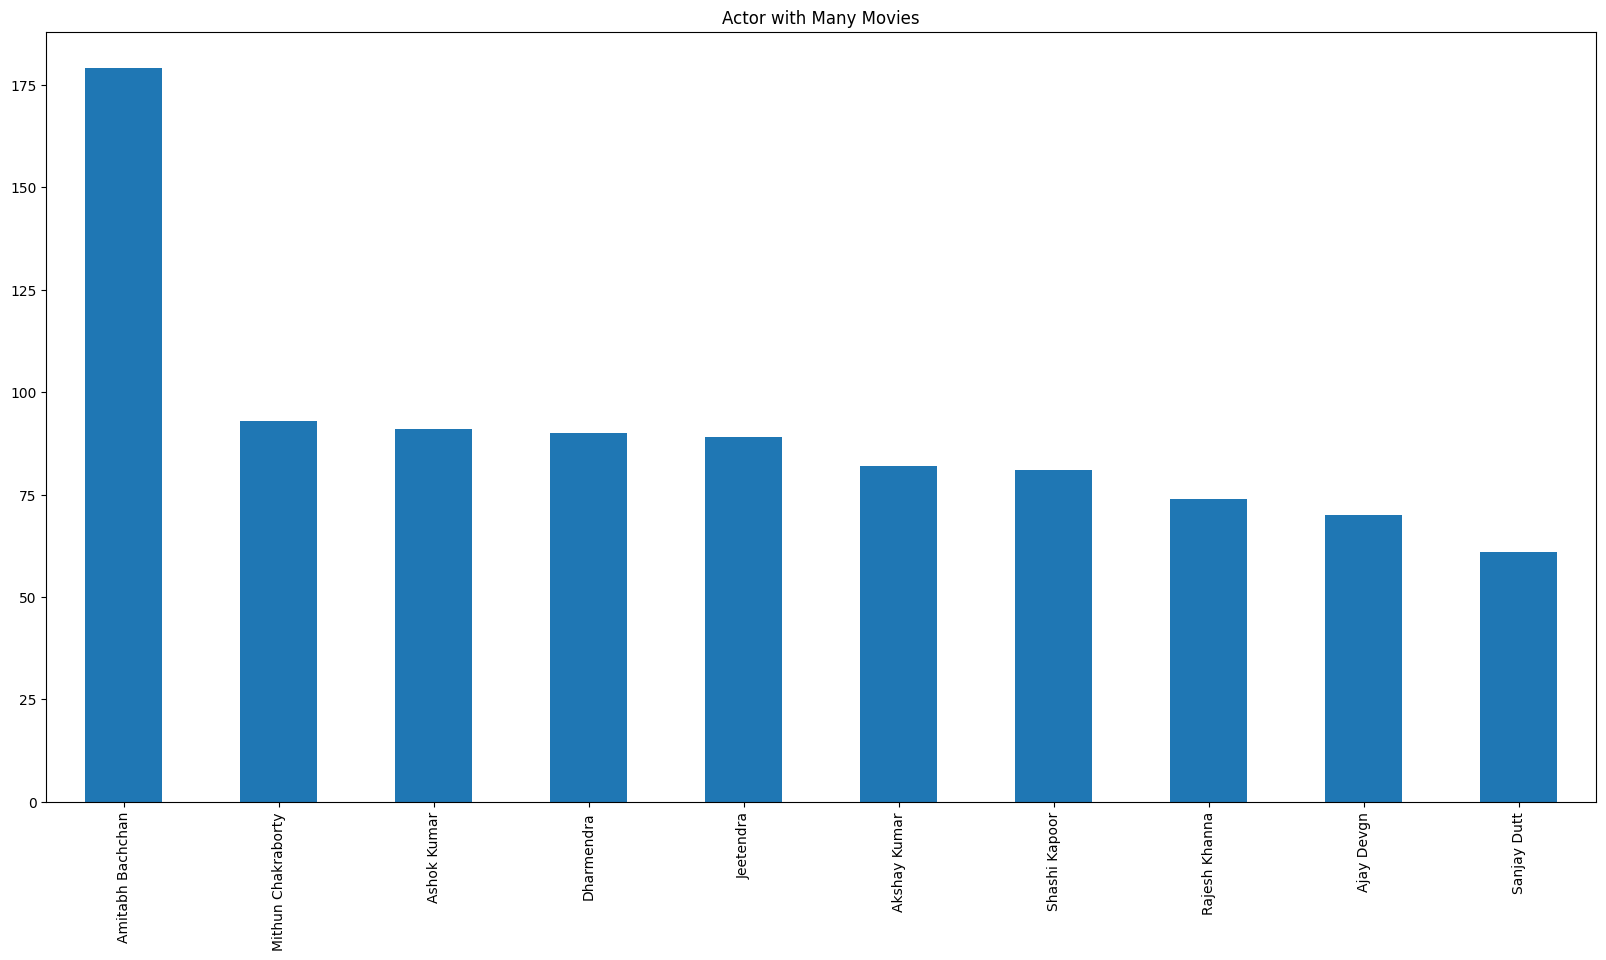

In [ ]:
plt.figure(figsize=(20,10))
df['Actor 1'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Actor with Many Movies')

Text(0.5, 1.0, 'Director with most Movies')

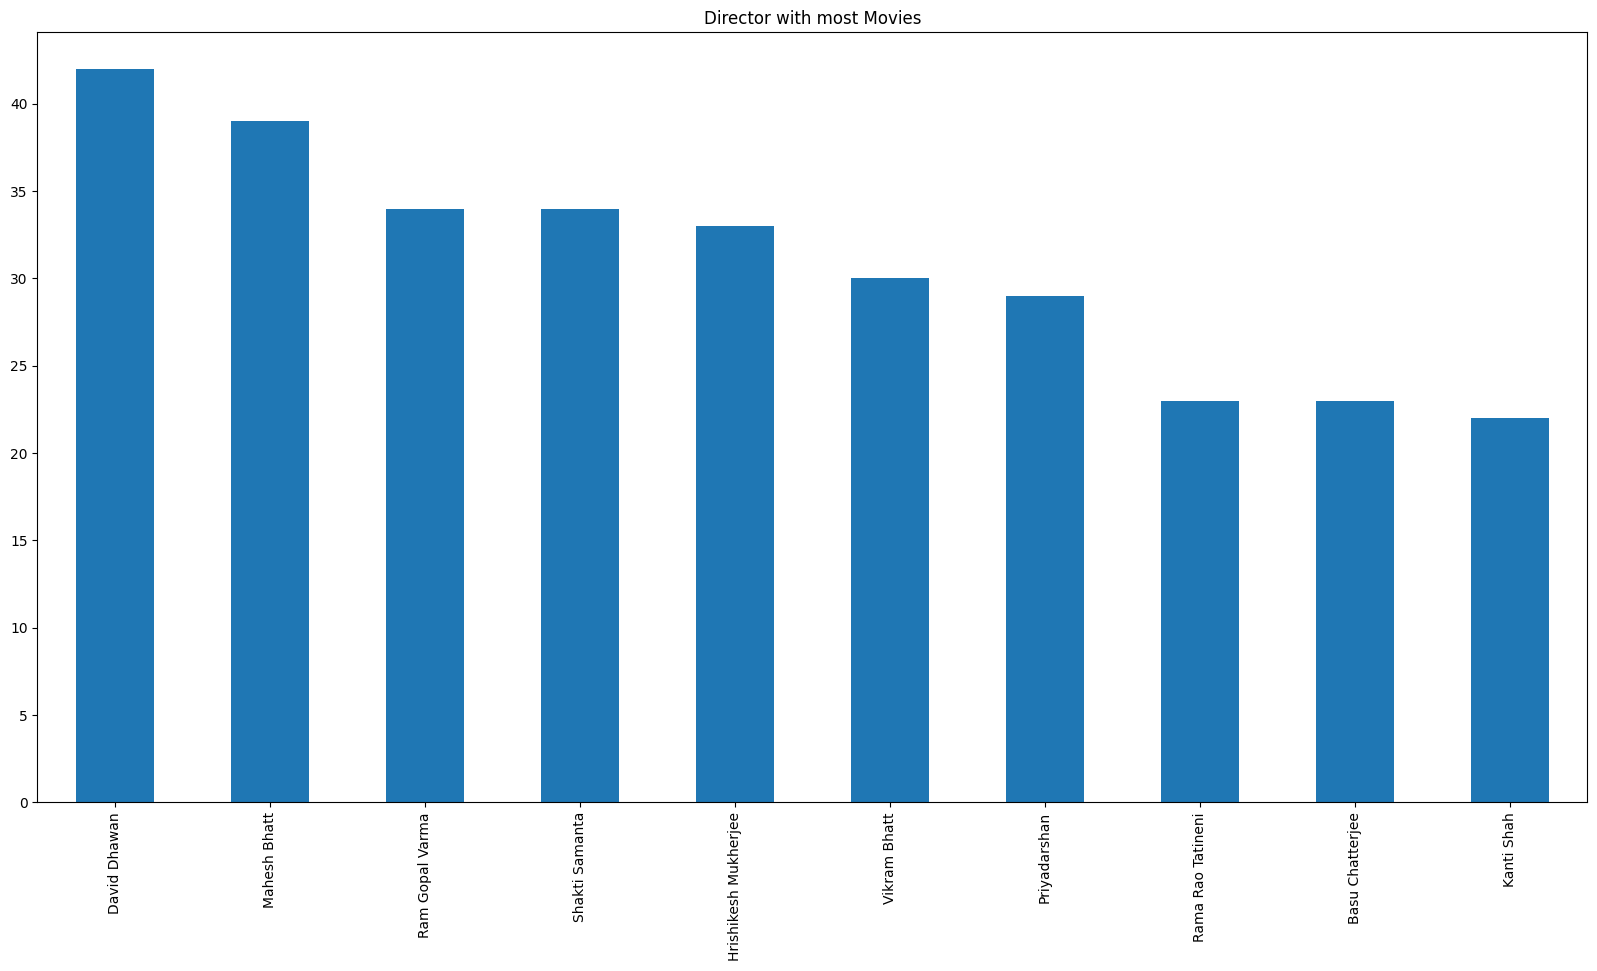

In [ ]:
plt.figure(figsize=(20,10))
df['Director'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Director with most Movies')

<Axes: >

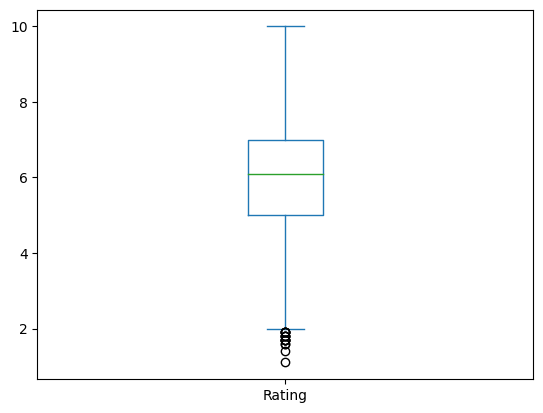

In [ ]:
df['Rating'].plot(kind='box')

<Axes: >

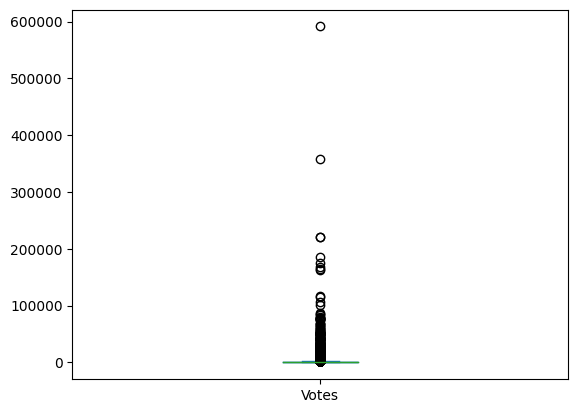

In [ ]:
df['Votes'].plot(kind='box')

<Axes: xlabel='Year', ylabel='Rating'>

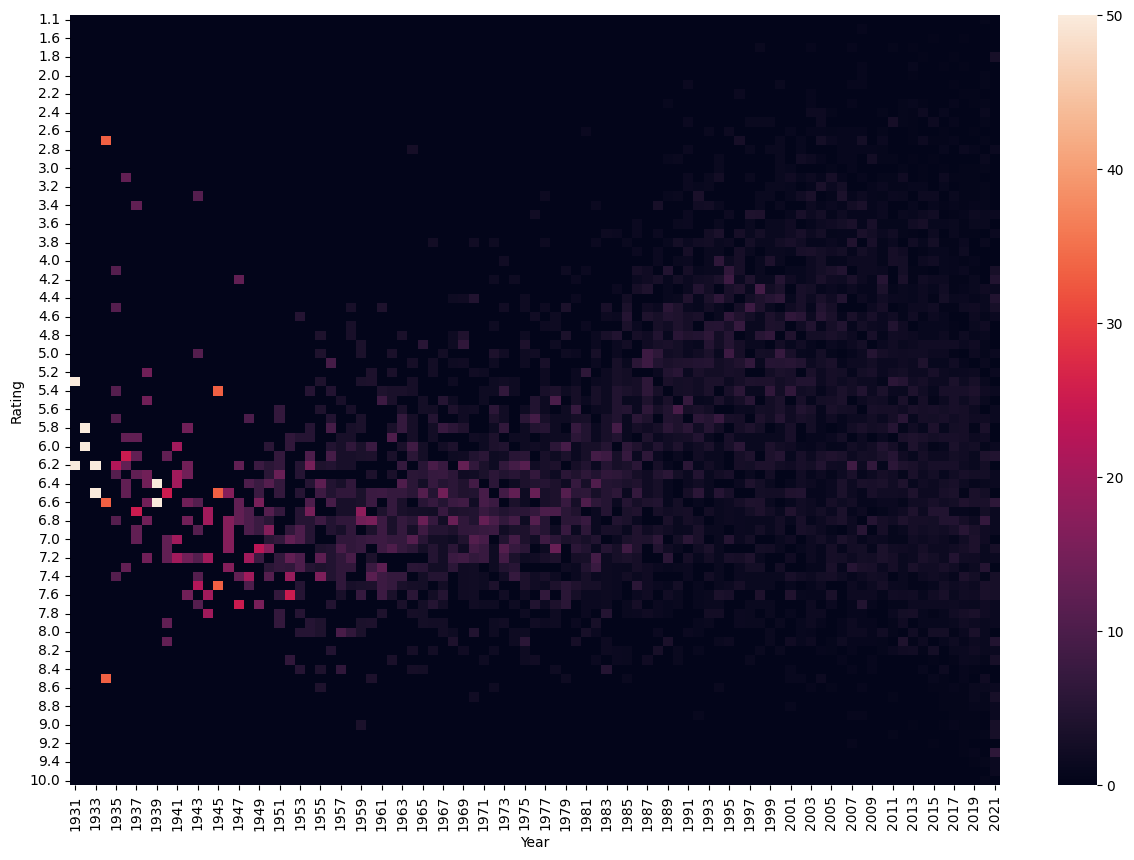

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(pd.crosstab(df['Rating'], df['Year'], normalize='columns') * 100)

<Axes: xlabel='Genre', ylabel='Rating'>

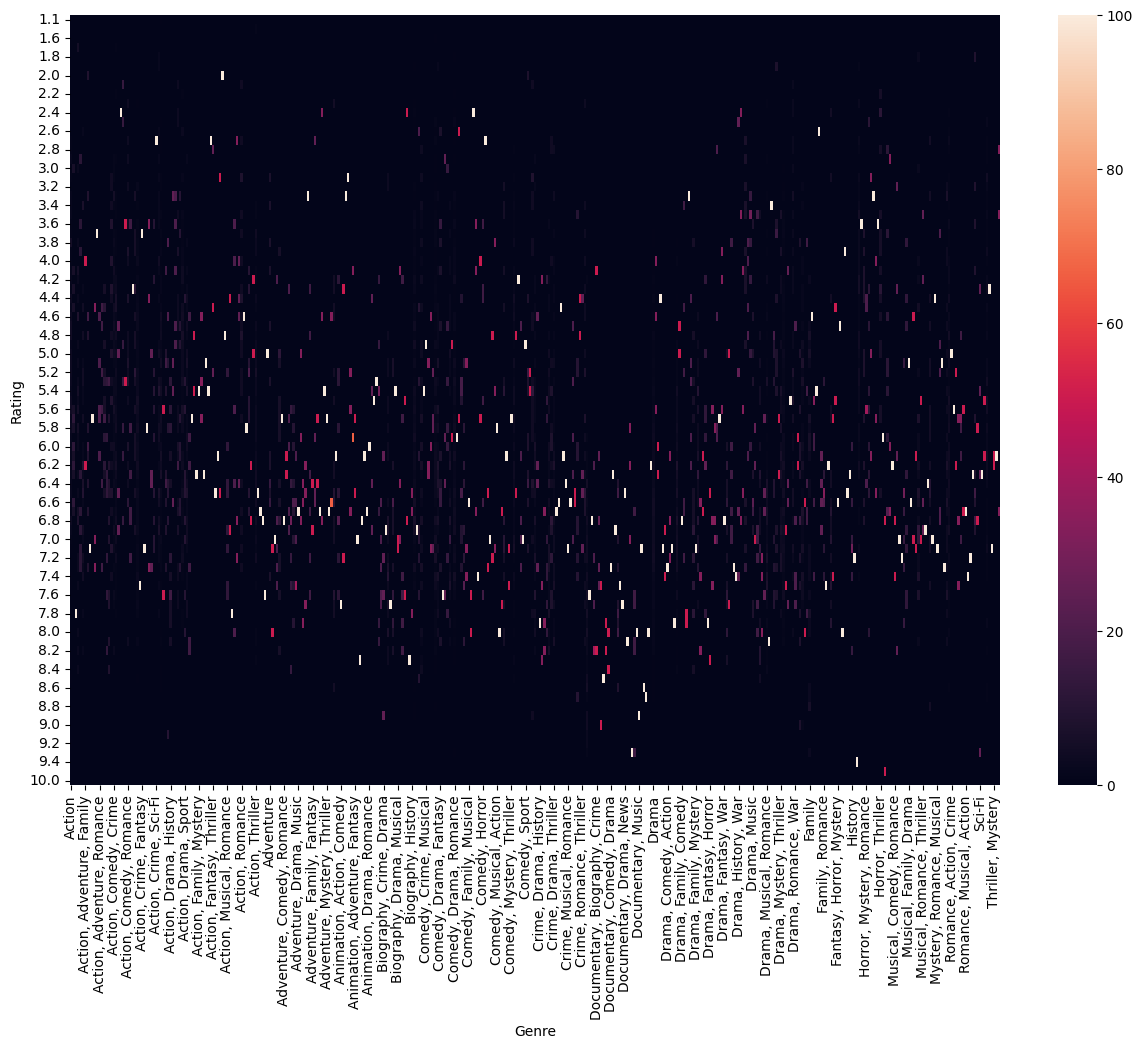

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.crosstab(df['Rating'], df['Genre'], normalize='columns') * 100)

<Axes: xlabel='Duration', ylabel='Rating'>

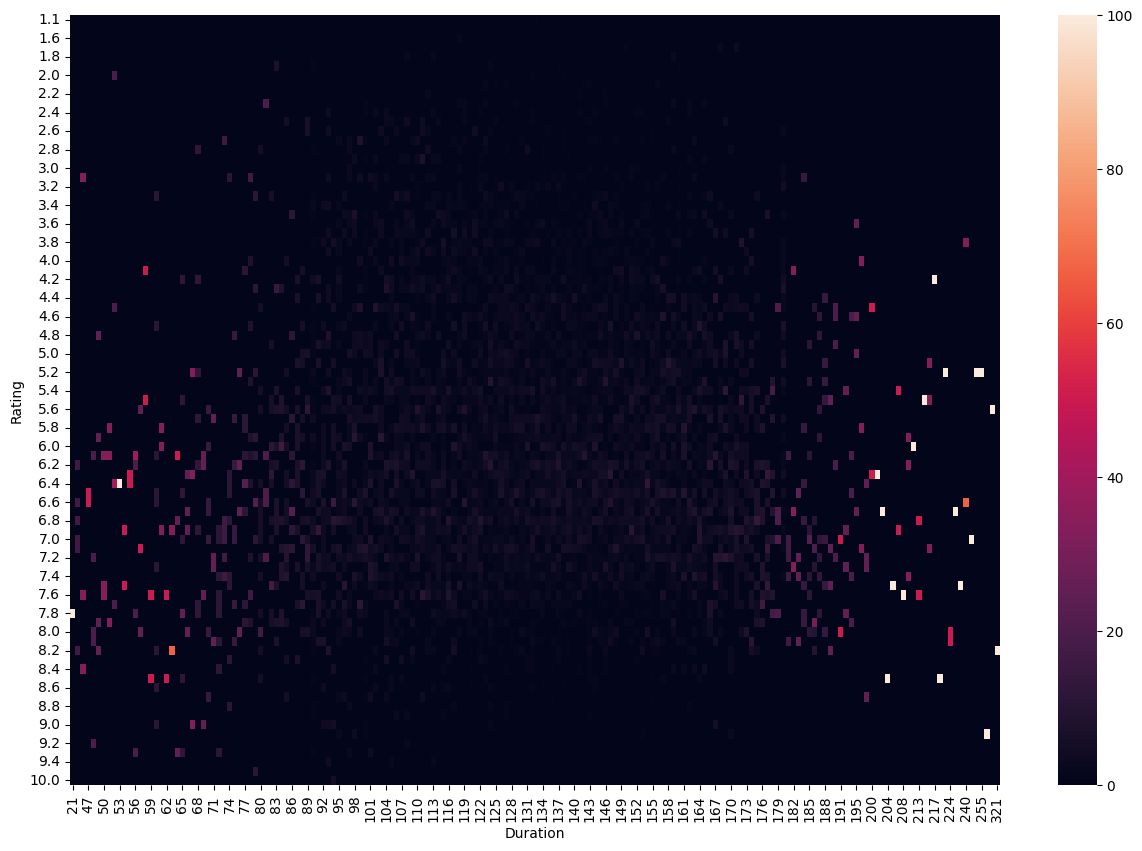

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.crosstab(df['Rating'], df['Duration'], normalize='columns') * 100)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
genre_counts = df['Genre'].value_counts()
df['Genre_encoded'] = df['Genre'].map(genre_counts)

In [ ]:
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')

In [ ]:
df['Genre_mean_rating'] = genre_mean_rating

In [ ]:
director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

In [ ]:
actor_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor_encoded'] = actor_mean_rating

<Axes: ylabel='Frequency'>

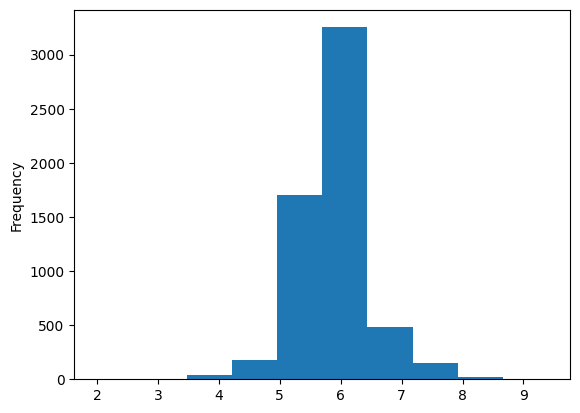

In [ ]:
df['Genre_mean_rating'].plot(kind='hist')


In [ ]:
X = df[[ 'Year', 'Votes', 'Duration','Genre_mean_rating','Director_encoded','Actor_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Regressor
df_regressor = DecisionTreeRegressor(random_state=42)
df_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = df_regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))
print('R2 score: ',r2_score(y_test,y_pred))

Mean Squared Error (MSE): 0.84
Mean absolute error:  0.6170794192997439
R2 score:  0.5464928722394091
